In [1]:
##Data loading
import os.path

import pandas as pd

x_train = pd.read_csv("model_v1/x_train.csv", sep=";")
y_train = pd.read_csv("model_v1/y_train.csv", sep=";")

x_test = pd.read_csv("model_v1/x_test.csv", sep=";")
y_test = pd.read_csv("model_v1/y_test.csv", sep=";")

In [2]:
x_train.head()

,age,sexe,residence,mode_entree,etat_patient_entree,motif_code,score_tri,occupation_lits,nbre_patient_urgence,occupation_salles_att,...,nbre_patient_score_3,nbre_patient_score_4,nbre_patient_score_5,hour_of_day,day_of_week,is_weekend,week,month,quarter,moyenne_dynamique_temps_attente
0,14,1,0.111474,11.0,2,0.085411,4,0.675532,11.0,0.181818,...,3.0,5.0,3.0,17,0,1,36,9,3,26.333333
1,65,1,0.040506,16.0,2,0.006384,3,0.691489,14.0,0.428571,...,3.0,8.0,2.0,12,0,1,1,1,1,136.400000
2,35,1,0.021796,11.0,2,0.052520,5,0.683511,23.0,0.565217,...,2.0,12.0,9.0,22,0,1,31,8,3,145.533333
3,17,1,0.063303,11.0,2,0.010865,4,0.882979,3.0,0.000000,...,0.0,2.0,0.0,8,2,1,4,1,1,39.200000
4,24,2,0.273121,11.0,2,0.011407,4,0.728723,11.0,0.363636,...,3.0,7.0,1.0,21,5,0,18,5,2,16.600000


In [104]:
y_train.value_counts().sort_index()

wait_time
0.0            2
1.0           51
2.0          110
3.0          224
4.0          516
            ... 
275.0         32
276.0         44
277.0         24
278.0         29
279.0         26
Length: 280, dtype: int64

In [3]:
count_nan_in_df = x_train.isnull().sum().sum()
print ('Count of NaN "x_train": ' + str(count_nan_in_df))

Count of NaN "x_train": 0


In [4]:
count_nan_in_df = y_train.isnull().sum().sum()
print ('Count of NaN "y_train": ' + str(count_nan_in_df))

Count of NaN "y_train": 0


In [5]:
count_nan_in_df = x_test.isnull().sum().sum()
print ('Count of NaN "x_test": ' + str(count_nan_in_df))

Count of NaN "x_test": 1


In [6]:
count_nan_in_df = y_test.isnull().sum().sum()
print ('Count of NaN "y_test": ' + str(count_nan_in_df))

Count of NaN "y_test": 0


In [7]:
print(x_test.shape)
x_test["wait_time"] = y_test.wait_time
x_test.dropna(inplace=True)

(26113, 23)


In [8]:
x_test.shape

(26112, 24)

In [9]:
x_test.reset_index(drop=True, inplace=True)
y_test = pd.DataFrame(x_test.wait_time)
x_test.drop(['wait_time'], axis=1, inplace=True)

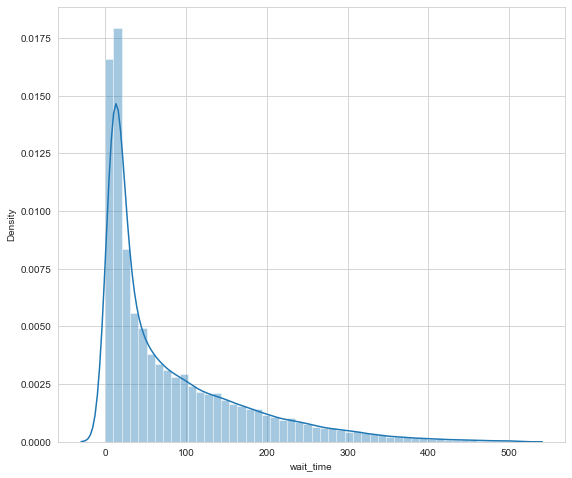

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.distplot(y_train['wait_time'])
#plt.subplot(1, 2, 2)
#sns.distplot(df['placement_exam_marks'])
plt.show()

#### Box plot

#### a. Box plot of raw train dataset

<AxesSubplot:xlabel='wait_time'>

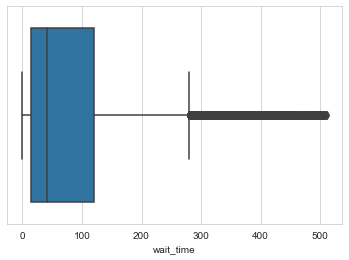

In [11]:
sns.boxplot(x=y_train['wait_time'])

In [12]:
#Based on z-score
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))

        mean = df[col].mean()
        sd = df[col].std()

        df = df[(df[col] <= mean+(n_std*sd))]
    print("Finished!")
    return df

In [13]:
mean = y_train.wait_time.mean()
sd = y_train.wait_time.std()

df = y_train[(y_train['wait_time'] > mean+(2*sd))]
print(mean+(2*sd))
print("Z-Score Outlier percentage in wait time: {:.3f}".format(len(df)/len(y_train)))

260.14430866463385
Z-Score Outlier percentage in wait time: 0.058


In [14]:
#Based on IQR
q75,q25 = np.percentile(np.array(y_train),[75,25])
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

df = y_train[(y_train['wait_time'] > max)]
print("min: ", min)
print("max: ", max)
print("IQR Outlier percentage in wait time: {:.3f}".format(len(df)/len(y_train)))

min:  -145.0
max:  279.0
IQR Outlier percentage in wait time: 0.046


In [15]:
filter_outlier = 1
if filter_outlier:
    x_train["wait_time"] = y_train.wait_time
    x_train = x_train[(x_train['wait_time'] <= max)]
    x_train.reset_index(inplace=True, drop=True)
    y_train = pd.DataFrame(x_train["wait_time"])
    x_train.drop(['wait_time'], axis=1, inplace=True)

In [16]:
x_train.head()

,age,sexe,residence,mode_entree,etat_patient_entree,motif_code,score_tri,occupation_lits,nbre_patient_urgence,occupation_salles_att,...,nbre_patient_score_3,nbre_patient_score_4,nbre_patient_score_5,hour_of_day,day_of_week,is_weekend,week,month,quarter,moyenne_dynamique_temps_attente
0,14,1,0.111474,11.0,2,0.085411,4,0.675532,11.0,0.181818,...,3.0,5.0,3.0,17,0,1,36,9,3,26.333333
1,65,1,0.040506,16.0,2,0.006384,3,0.691489,14.0,0.428571,...,3.0,8.0,2.0,12,0,1,1,1,1,136.400000
2,35,1,0.021796,11.0,2,0.052520,5,0.683511,23.0,0.565217,...,2.0,12.0,9.0,22,0,1,31,8,3,145.533333
3,17,1,0.063303,11.0,2,0.010865,4,0.882979,3.0,0.000000,...,0.0,2.0,0.0,8,2,1,4,1,1,39.200000
4,24,2,0.273121,11.0,2,0.011407,4,0.728723,11.0,0.363636,...,3.0,7.0,1.0,21,5,0,18,5,2,16.600000


#### b. Box plot of train dataset after outlier removal with IQR distance

<AxesSubplot:xlabel='wait_time'>

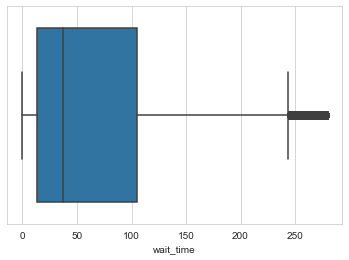

In [17]:
sns.boxplot(x=y_train['wait_time'])

##### Train wait time dist plot

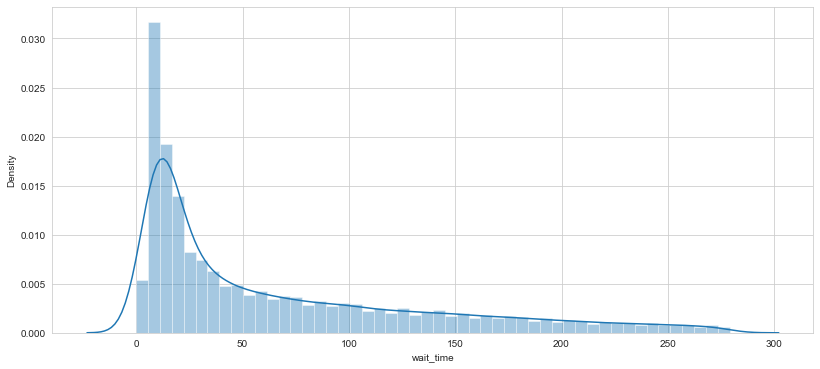

In [18]:
plt.figure(figsize=(30, 6))
plt.subplot(1, 2, 1)
sns.distplot(y_train['wait_time'])
plt.show()

In [19]:
x_train.shape

(58114, 23)

In [20]:
y_train.describe()

,wait_time
count,58114.000000
mean,67.412637
std,69.050574
min,0.000000
25%,13.000000
50%,37.000000
75%,105.000000
max,279.000000


#### Wait time train target feature transformation

In [21]:
target_transf = 0
if target_transf:
    df_transf = x_train.copy(deep=True)
    df_transf.wait_time = np.log(df_transf.wait_time + 0.0000001)

In [22]:
if target_transf:
    plt.figure(figsize=(30, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df_transf['wait_time'])
    plt.show()

In [23]:
if target_transf:
    df_transf.wait_time.describe()

In [24]:
if target_transf:
    sns.boxplot(x=df_transf['wait_time'])

In [25]:
if target_transf:
    #Based on IQR
    q75,q25 = np.percentile(np.array(df_transf.wait_time),[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df_transf = df_transf[(df_transf['wait_time'] <= max)]
    df_transf = df_transf[(df_transf['wait_time'] >= min)]
    df_transf.reset_index(drop=True, inplace=True)

In [26]:
if target_transf:
    plt.figure(figsize=(30, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df_transf['wait_time'])
    plt.show()

In [27]:
if target_transf:
    df_transf.wait_time.describe()

In [28]:
if target_transf:
    df_transf.wait_time = np.round(df_transf.wait_time)

In [29]:
if target_transf:
    df_transf.wait_time.describe()

#### Wait time test feature transformation

In [30]:
if target_transf:
    df_transf_test = x_test.copy(deep=True)
    df_transf_test['wait_time'] = y_test.wait_time
    df_transf_test.wait_time = np.log(df_transf_test.wait_time + 0.0000001)

In [31]:
if target_transf:
    plt.figure(figsize=(30, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df_transf_test['wait_time'])
    plt.show()

In [32]:
if target_transf:
    df_transf_test.wait_time.describe()

In [33]:
if target_transf:
    sns.boxplot(x=df_transf_test['wait_time'])

In [34]:
if target_transf:
    #Based on train dataset IQR
    df_transf_test = df_transf_test[(df_transf_test['wait_time'] <= max)]
    df_transf_test = df_transf_test[(df_transf_test['wait_time'] >= min)]
    df_transf_test.reset_index(drop=True, inplace=True)

In [35]:
if target_transf:
    plt.figure(figsize=(30, 6))
    plt.subplot(1, 2, 1)
    sns.distplot(df_transf_test['wait_time'])
    plt.show()

In [36]:
if target_transf:
    df_transf_test.wait_time.describe()

In [37]:
if target_transf:
    df_transf_test.wait_time = np.round(df_transf_test.wait_time)

In [38]:
if target_transf:
    df_transf_test.wait_time.describe()

#### Outlier further removal

mean = y_train.wait_time.mean()
sd = y_train.wait_time.std()

df = y_train[(y_train['wait_time'] > mean+(3*sd))]
print(mean+(3*sd))
print("Outlier percentage in wait time: {:.3f}".format(len(df)/len(y_train)))

#Based on IQR
q75,q25 = np.percentile(np.array(y_train),[75,25])
intr_qr = q75-q25

max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)

df = y_train[(y_train['wait_time'] > max)]
print(max)
print("Outlier percentage in wait time: {:.3f}".format(len(df)/len(y_train)))

x_train.shape

x_train = remove_outliers(x_train, ["wait_time"],3)
x_train.reset_index(inplace=True, drop=True)
y_train = pd.DataFrame(x_train["wait_time"])
x_train.drop(['wait_time'], axis=1, inplace=True)
sns.boxplot(x=y_train['wait_time'])

x_train.shape

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.distplot(y_train['wait_time'])
plt.show()

### c. Outlier removal from test dataset

<AxesSubplot:xlabel='wait_time'>

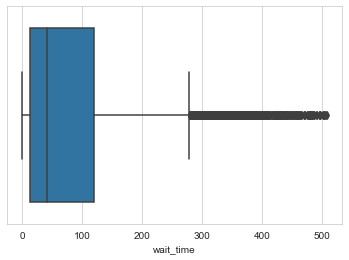

In [39]:
sns.boxplot(x=y_test['wait_time'])

In [40]:
mean = y_train.wait_time.mean()
sd = y_train.wait_time.std()

df = y_test[(y_test['wait_time'] > mean+(2*sd))]
print(mean+(3*sd))
print("Outlier percentage in wait time: {:.3f}".format(len(df)/len(y_train)))

274.56435787518933
Outlier percentage in wait time: 0.049


In [41]:
df = y_test[(y_test['wait_time'] > max)]
print(max)
print("Outlier percentage in wait time: {:.3f}".format(len(df)/len(y_train)))


279.0
Outlier percentage in wait time: 0.021


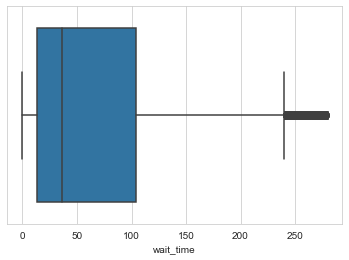

In [42]:
if filter_outlier:
    x_test['wait_time'] = y_test.wait_time
    x_test = x_test[(x_test['wait_time'] <= max)]
    x_test.reset_index(inplace=True, drop=True)
    y_test = pd.DataFrame(x_test["wait_time"])
    sns.boxplot(x=y_test['wait_time'])

In [43]:
if filter_outlier:
    y_test = pd.DataFrame(x_test.wait_time)
    x_test.drop(['wait_time'], axis=1, inplace=True)

### d. Plot Daily and Hourly, wait time and arrivals, statistics

In [44]:
df_plot = pd.DataFrame()
df_plot['day_of_week'] = x_train['day_of_week']
df_plot['wait_time'] = y_train['wait_time']
df_plot = df_plot.groupby(by=["day_of_week"]).mean()
df_plot.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_plot

,wait_time
Mon,79.735441
Tue,72.483843
Wed,63.133195
Thu,71.153329
Fri,69.503303
Sat,59.899828
Sun,54.844008


<AxesSubplot:>

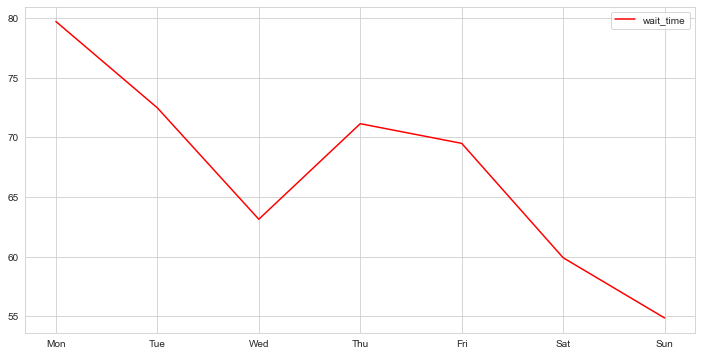

In [45]:
df_plot.plot(figsize=(12, 6), color='red')

In [46]:
df_plot.describe()

,wait_time
count,7.000000
mean,67.250421
std,8.450587
min,54.844008
25%,61.516511
50%,69.503303
75%,71.818586
max,79.735441


In [47]:
df_plot_hourly = pd.DataFrame()
df_plot_hourly['hour_of_day'] = x_train['hour_of_day']
df_plot_hourly['wait_time'] = y_train['wait_time']
df_plot_hourly = df_plot_hourly.groupby(by=["hour_of_day"]).mean()
df_plot_hourly

,wait_time
hour_of_day,
0,43.548926
1,34.248588
2,29.346682
3,24.992415
4,22.709852
5,23.711111
6,20.194989
7,24.570007
8,32.046941


<AxesSubplot:xlabel='hour_of_day'>

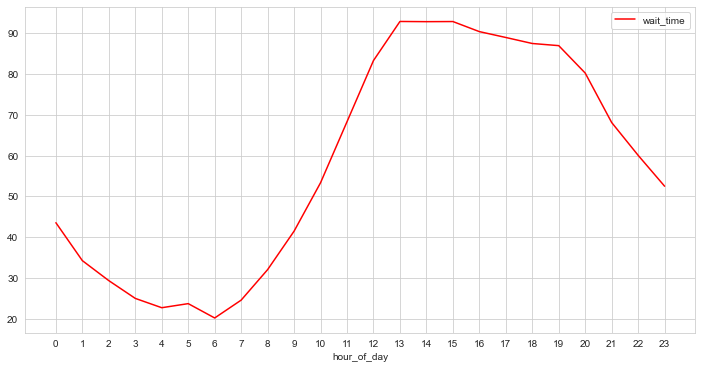

In [48]:
df_plot_hourly.plot.line(figsize=(12, 6), color='red', xticks = df_plot_hourly.index)

In [49]:
#Plot arrivals
df_plot_arrivals = pd.DataFrame()
df_plot_arrivals['day_of_week'] = x_train['day_of_week']
df_plot_arrivals['nbre_patient_urgence'] = x_train['nbre_patient_urgence']
df_plot_arrivals = df_plot_arrivals.groupby(by=["day_of_week"]).mean()
df_plot_arrivals.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_plot_arrivals

,nbre_patient_urgence
Mon,17.330809
Tue,15.384053
Wed,14.564212
Thu,15.065852
Fri,15.220661
Sat,13.782673
Sun,13.096434


<AxesSubplot:>

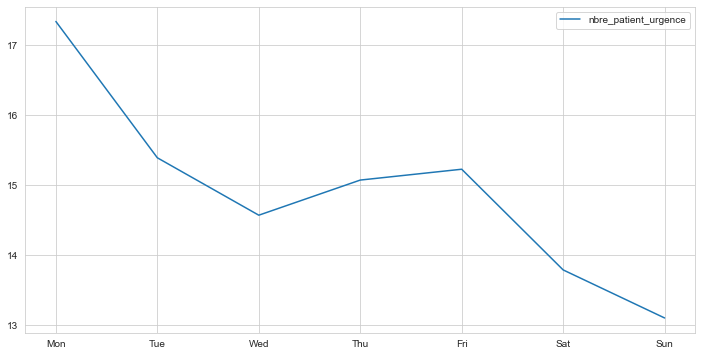

In [50]:
df_plot_arrivals.plot(figsize=(12, 6))

In [51]:
df_plot_arrivals.describe()

,nbre_patient_urgence
count,7.000000
mean,14.920671
std,1.346879
min,13.096434
25%,14.173443
50%,15.065852
75%,15.302357
max,17.330809


In [52]:
df_plot_arrivals_hourly = pd.DataFrame()
df_plot_arrivals_hourly['hour_of_day'] = x_train['hour_of_day']
df_plot_arrivals_hourly['nbre_patient_urgence'] = x_train['nbre_patient_urgence']
df_plot_arrivals_hourly = df_plot_arrivals_hourly.groupby(by=["hour_of_day"]).mean()
df_plot_arrivals_hourly

,nbre_patient_urgence
hour_of_day,
0,11.531424
1,9.312618
2,7.131579
3,5.385588
4,4.545209
5,3.933333
6,3.675381
7,4.085999
8,6.212690


<AxesSubplot:xlabel='hour_of_day'>

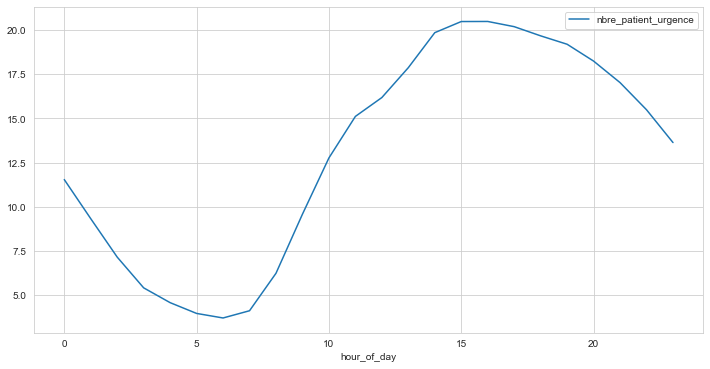

In [53]:
df_plot_arrivals_hourly.plot(figsize=(12, 6))

<AxesSubplot:xlabel='hour_of_day'>

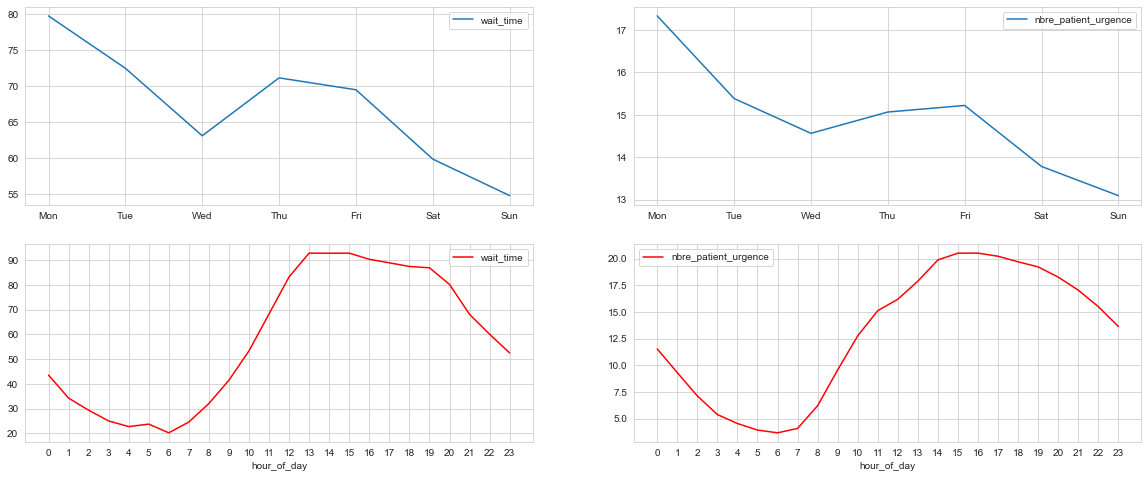

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(20,8))

df_plot.plot(ax=axes[0,0])

df_plot_arrivals.plot(ax=axes[0,1])

df_plot_hourly.plot(ax=axes[1,0], color='red', xticks = df_plot_hourly.index)

df_plot_arrivals_hourly.plot(ax=axes[1,1], color='red', xticks = df_plot_arrivals_hourly.index)

# Features correlation

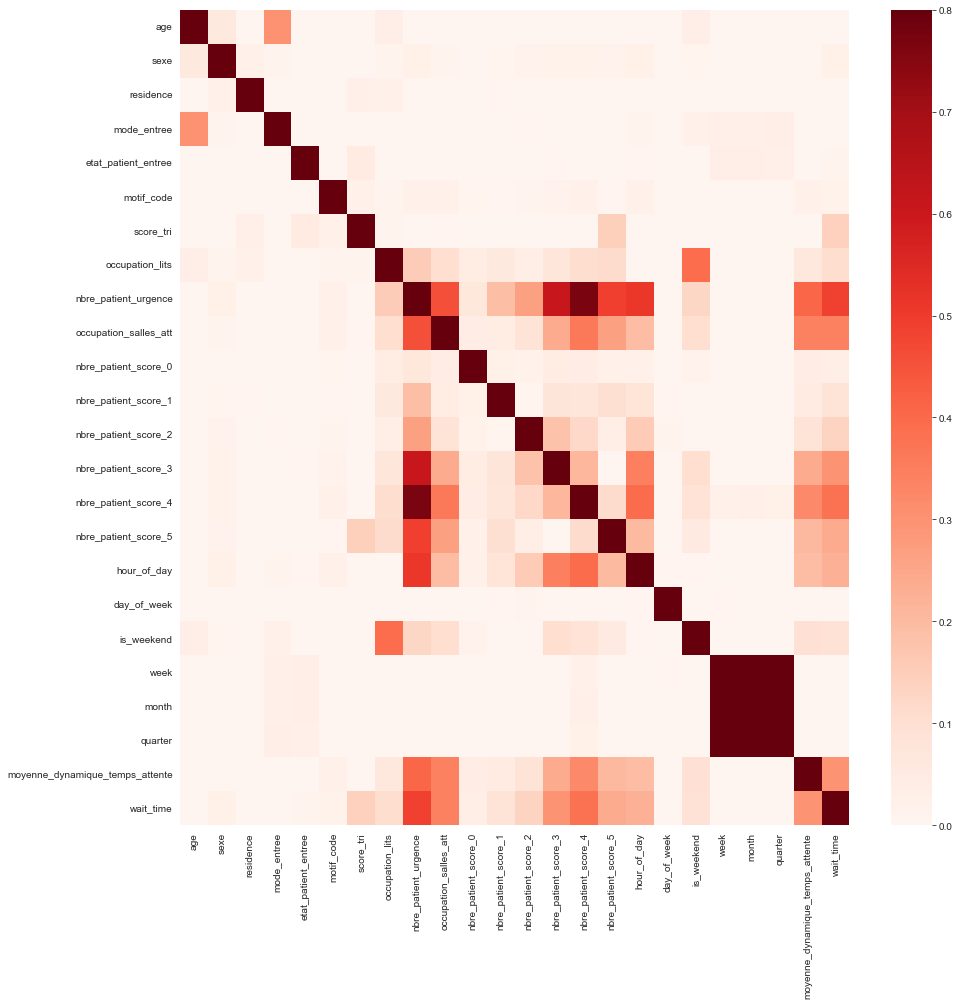

In [55]:
import matplotlib.pyplot as plt

train_data = x_train.copy(deep=True)
train_data['wait_time'] = y_train.wait_time

C_mat = train_data.corr()
fig = plt.figure(figsize=(15, 15))

sns.heatmap(C_mat, vmin=0, vmax=.8, cmap=plt.cm.Reds)
plt.show()

In [56]:
# Saving feature names for later use
feature_list = list(x_train.columns)
feature_list

['age',
 'sexe',
 'residence',
 'mode_entree',
 'etat_patient_entree',
 'motif_code',
 'score_tri',
 'occupation_lits',
 'nbre_patient_urgence',
 'occupation_salles_att',
 'nbre_patient_score_0',
 'nbre_patient_score_1',
 'nbre_patient_score_2',
 'nbre_patient_score_3',
 'nbre_patient_score_4',
 'nbre_patient_score_5',
 'hour_of_day',
 'day_of_week',
 'is_weekend',
 'week',
 'month',
 'quarter',
 'moyenne_dynamique_temps_attente']

#### Numpy arrays without target transformation

In [57]:
# Use numpy to convert to arrays
import numpy as np  # Labels are the values we want to predict

train_features = np.array(x_train)
test_features = np.array(x_test)
train_labels = np.array(y_train)
test_labels = np.array(y_test)

#### Numpy arrays with target transformation

In [58]:
if target_transf:
    # Use numpy to convert to arrays
    import numpy as np  # Labels are the values we want to predict

    train_labels = np.array(df_transf.wait_time)
    test_labels = np.array(df_transf_test.wait_time)

    #Eleminate most correlated feature with the target
    df_transf.drop(columns=['moyenne_dynamique_temps_attente'], axis=1, inplace=True)
    df_transf_test.drop(columns=['moyenne_dynamique_temps_attente'], axis=1, inplace=True)

    df_transf.drop(['wait_time'], axis=1, inplace=True)
    df_transf_test.drop(['wait_time'], axis=1, inplace=True)

    train_features = np.array(df_transf)
    test_features = np.array(df_transf_test)

In [59]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (58114, 23)
Training Labels Shape: (58114, 1)
Testing Features Shape: (24883, 23)
Testing Labels Shape: (24883, 1)


In [60]:
# The baseline predictions are the historical averages
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

df_metrics = pd.DataFrame(columns=['train', 'test'], index=['mae', 'mse', 'rmse'])

#Ecart moyenne(wait_time-moyenne_temps_att)
baseline_preds = test_features[:, feature_list.index('moyenne_dynamique_temps_attente')]

#baseline_errors = abs(baseline_preds - test_labels)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2), ' minutes')

mae = mean_absolute_error(test_labels, baseline_preds)
mape = mean_absolute_percentage_error(test_labels, baseline_preds)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, baseline_preds)
rmse = mse ** .5
df_metrics.test = [mae, mse, rmse]


#Train error metrics
baseline_preds = train_features[:, feature_list.index('moyenne_dynamique_temps_attente')]

#baseline_errors = abs(baseline_preds - test_labels)
#print('Average baseline error: ', round(np.mean(baseline_errors), 2), ' minutes')

mae = mean_absolute_error(train_labels, baseline_preds)
mape = mean_absolute_percentage_error(train_labels, baseline_preds)  # Calculate and display accuracy
mse = mean_squared_error(train_labels, baseline_preds)
rmse = mse ** .5
df_metrics.train = [mae, mse, rmse]
df_metrics
#Sans unité
#print('mae:', mae)
#print('mse:', mse)
#print('rmse:', rmse)
#print('mape:', mape, ' %')

,train,test
mae,49.175397,49.419441
mse,8963.691114,8837.484697
rmse,94.676772,94.007897


In [61]:
#Eleminate most correlated feature with the target
drop = 0
if drop:
    x_train.drop(columns=['moyenne_dynamique_temps_attente'], inplace=True)
    x_test.drop(columns=['moyenne_dynamique_temps_attente'], inplace=True)

In [62]:
train_features = np.array(x_train)
test_features = np.array(x_test)

In [63]:
print('Training Features Shape:', train_features.shape)
print('Testing Features Shape:', test_features.shape)

Training Features Shape: (58114, 23)
Testing Features Shape: (24883, 23)


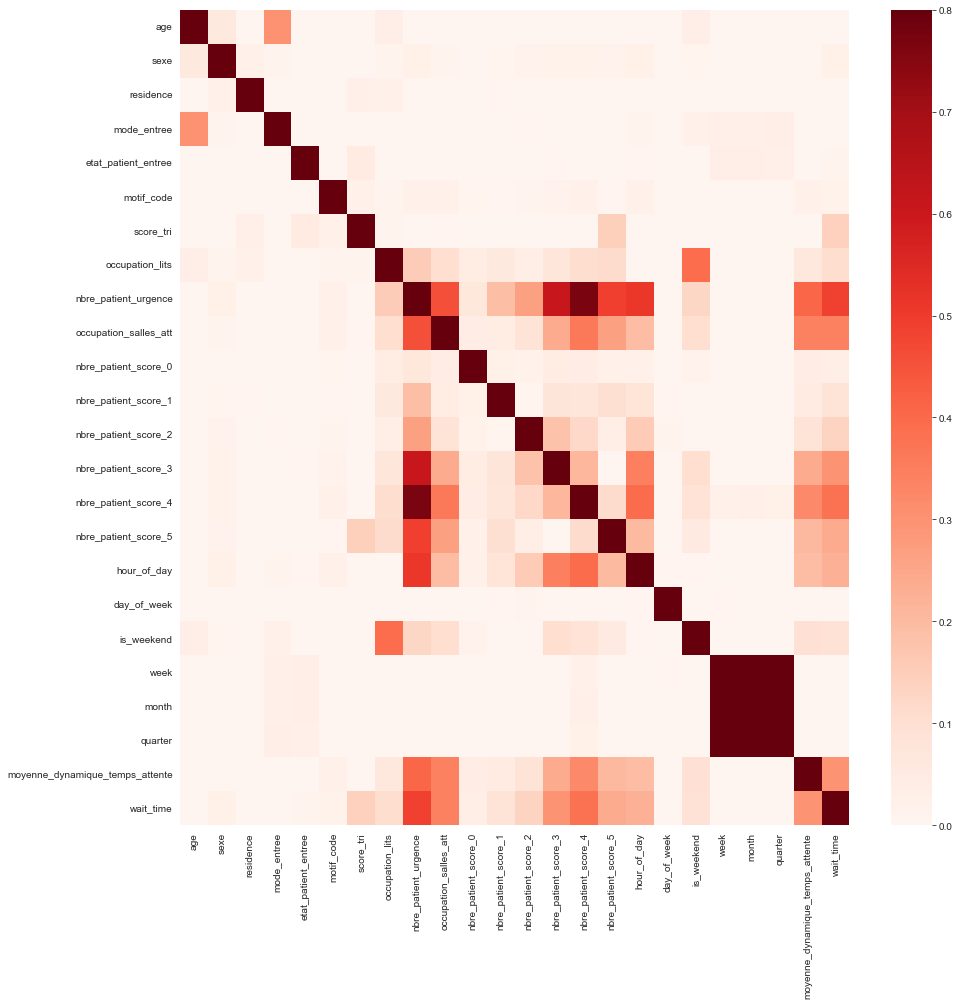

In [64]:
train_data = x_train.copy(deep=True)
train_data['wait_time'] = y_train.wait_time

C_mat = train_data.corr()

fig = plt.figure(figsize=(15, 15))

sns.heatmap(C_mat, vmin=0, vmax=.8, cmap=plt.cm.Reds)
plt.show()

## Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

# Feature selection

In [66]:
from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Python code t get difference of two lists
# Using set()
def diff(li1, li2):
    return list(set(li1) - set(li2))

In [67]:
r2scores=[]
adjustedr2 = []
feature_names = []
added_feature = []
hist_feature_names = []
for i in range(1, 24):
    reduce_dim_pipe = Pipeline(steps=[
        ('reduce_dim', SelectKBest(k=i, score_func=f_regression)),
    ])

    pipeline = Pipeline(steps=[
        ('reduce_dim_pipe', reduce_dim_pipe),
        ('regress', LinearRegression())
    ])

    #calculate cross validated R2
    R2 = cross_val_score(pipeline, X=x_train, y=y_train,cv=23, scoring='r2').mean()
    r2scores.append(R2)

    #calculate Adj R2
    n= len(x_train)
    p = i #len(X.columns)
    adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
    #     print(r2, adjustedr2)
    adjustedr2.append(adj_R2)

    reduce_dim_pipe.fit(X=x_train, y=y_train)
    # Get columns to keep
    cols = reduce_dim_pipe.named_steps['reduce_dim'].get_support(indices=True)
    # Create new dataframe with only desired columns
    #   print(cols)

    features_df_new = x_train.iloc[:, cols]
    best_features = list(features_df_new.columns)
    #
    #   print(best_features)
    if len(best_features) > 1:
        added_feature = diff(best_features, hist_feature_names)
    else:
        added_feature = best_features

    #   print(added_feature)
    hist_feature_names = best_features
    #feature_names.append(best_features)
    feature_names.append(added_feature)

In [68]:
scoring_df = pd.DataFrame(np.column_stack((r2scores, adjustedr2)), columns=['R2', 'Adj_R2'])
scoring_df['feature_names'] = feature_names
scoring_df['features'] = range(1, 24)
scoring_df

,R2,Adj_R2,feature_names,features
0,0.238795,0.238782,[nbre_patient_urgence],1
1,0.238818,0.238792,[nbre_patient_score_4],2
2,0.255957,0.255918,[occupation_salles_att],3
3,0.253853,0.253802,[moyenne_dynamique_temps_attente],4
4,0.261493,0.261429,[nbre_patient_score_3],5
5,0.261573,0.261497,[nbre_patient_score_5],6
6,0.261900,0.261811,[hour_of_day],7
7,0.283332,0.283233,[score_tri],8
8,0.283338,0.283227,[nbre_patient_score_2],9
9,0.283876,0.283753,[occupation_lits],10


Text(0.5, 1.0, 'Plot between number of features and R2/Adj R2 scores')

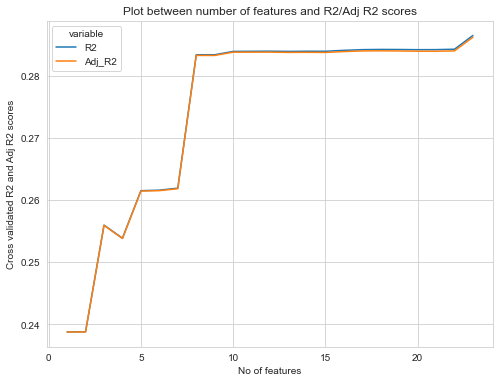

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))
#convert data frame from wide format to long format so that we can pass into seaborn line plot function to draw multiple line plots in same figure
# https://stackoverflow.com/questions/52308749/how-do-i-create-a-multiline-plot-using-seaborn
long_format_df = pd.melt(scoring_df.loc[:, ['features','R2', 'Adj_R2']], ['features'])
sns.lineplot(x='features', y='value', hue='variable', data=long_format_df, ax=ax)
ax.set_xlabel('No of features')
ax.set_ylabel('Cross validated R2 and Adj R2 scores')
ax.set_title('Plot between number of features and R2/Adj R2 scores')



In [70]:
x_train.shape

(58114, 23)

# Train Model

### 1. Random Forest

##### Out of Bag Error Rate

In [71]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor  # Instantiate model
import time
fit_rf = RandomForestRegressor(max_features=0.1, max_depth=9,
                           random_state=21)
fit_rf.set_params(warm_start=True,
                  oob_score=True)

min_estimators = 1
max_estimators = 100

error_rate = {}

start = time.time()
for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(train_features[:5000,], train_labels[:5000,])

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error
    if i % 50 == 0:
        print("Elapsed time: ", time.time() - start, "s")
print("Total elapsed time: ", time.time() - start, "s")
# Convert dictionary to a pandas series for easy plotting
oob_series = pd.Series(error_rate)

Elapsed time:  0.9036037921905518 s
Elapsed time:  3.1465985774993896 s
Total elapsed time:  3.1465985774993896 s


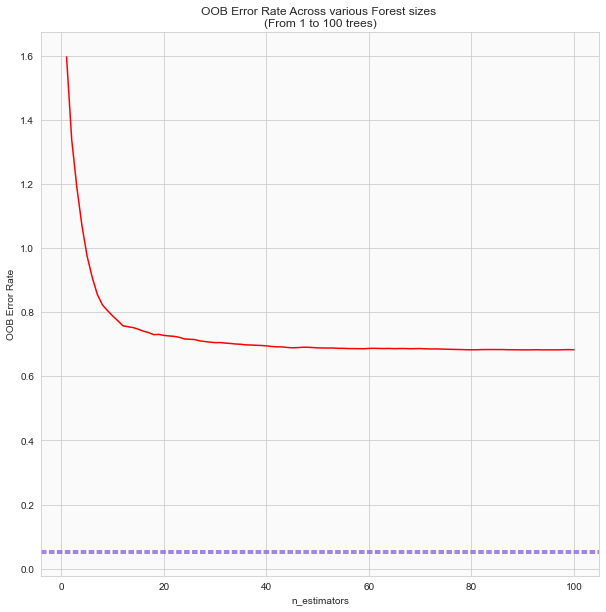

In [72]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.055,
            color='#875FDB',
            linestyle='--')
plt.axhline(0.05,
            color='#875FDB',
            linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From ' + str(min_estimators) + ' to ' + str(max_estimators) + ' trees)')
plt.show()

##### Model RF

In [73]:
rf = RandomForestRegressor(n_estimators=80, max_features=0.1, max_depth=9,
                           random_state=21)  # Train the model on training data

#Start timer
start = time.time()
rf.fit(train_features, train_labels.ravel())

#End timer
end = time.time()
print("The time of execution of above program is :", end - start, " s")

"""
Explanation for train_labels:
.ravel will convert that array shape to (n, ) (i.e. flatten it)
"""

The time of execution of above program is : 2.326463222503662  s


'\nExplanation for train_labels:\n.ravel will convert that array shape to (n, ) (i.e. flatten it)\n'

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Use the forest's predict method on the test data

#Start timer
start = time.time()
predictions = rf.predict(test_features)  # Calculate the absolute errors

#End timer
end = time.time()
print("The time of execution of above program is :", end - start, " s")

#errors = abs(predictions - test_labels)# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), ' minutes.')

#predictions = np.exp(predictions)

mae = mean_absolute_error(test_labels, predictions)
mape = mean_absolute_percentage_error(test_labels, predictions)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, predictions)
rmse = mse ** .5

#Sans unité
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

The time of execution of above program is : 0.1829991340637207  s
mae: 42.71774298234358
mse: 3176.118047791138
rmse: 56.35705854452606
mape: 5283473351290.649  %


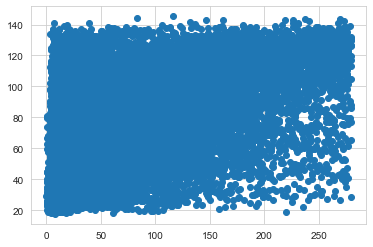

In [75]:
plt.scatter(test_labels, predictions)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

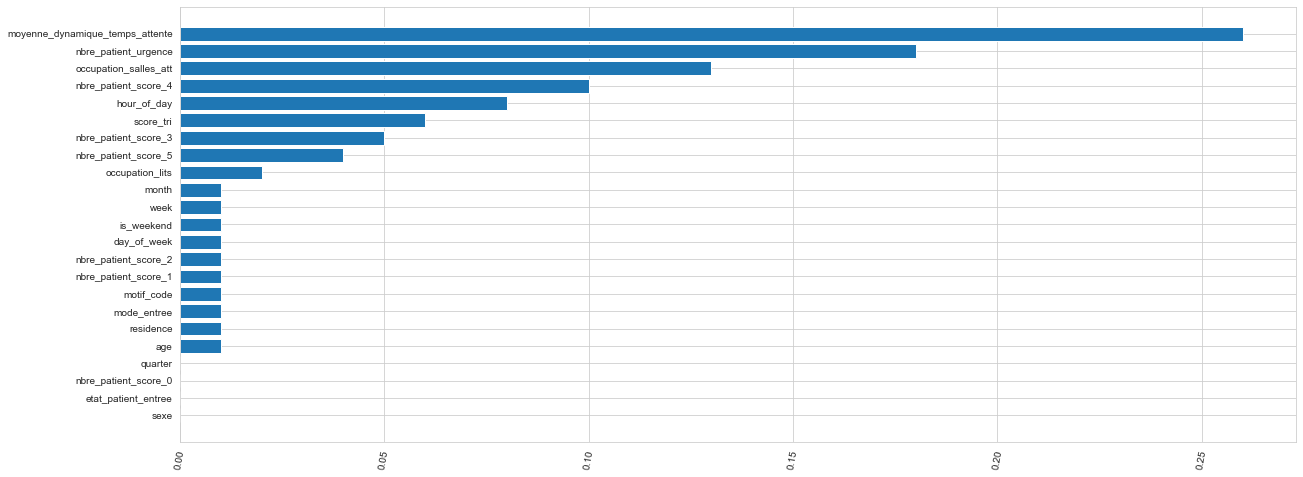

In [76]:
# Get numerical feature importances
importances = list(rf.feature_importances_)  # List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in
                       zip(feature_list, importances)]  # Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=False)  # Print out the feature and importances
"""for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))"""

feature, importance = zip(*feature_importances)
plt.figure(figsize=(20,8))
plt.barh(feature, importance)
plt.xticks(rotation = 80)

##### RF with only the 7 most important variables

In [77]:
# New random forest with only the 7 most important variables
rf_most_important = RandomForestRegressor(n_estimators=80, max_features=0.1, max_depth=9,
                                          random_state=20)  # Extract the two most important features
important_indices = [feature_list.index('moyenne_dynamique_temps_attente'), feature_list.index('nbre_patient_urgence'),
                     feature_list.index('occupation_salles_att'), feature_list.index('nbre_patient_score_4'),
                     feature_list.index('hour_of_day'), feature_list.index('nbre_patient_score_3'),
                     feature_list.index('score_tri'),
                     ]

train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]  # Train the random forest

rf_most_important.fit(train_important, train_labels)  # Make predictions and determine the error
predictions_v2 = rf_most_important.predict(test_important)
#predictions_v2 = np.exp(predictions_v2)

mae = mean_absolute_error(test_labels, predictions_v2)
mape = mean_absolute_percentage_error(test_labels, predictions_v2)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, predictions_v2)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

mae: 41.18128350806652
mse: 3093.839084240355
rmse: 55.622289455220695
mape: 5166977200172.657  %


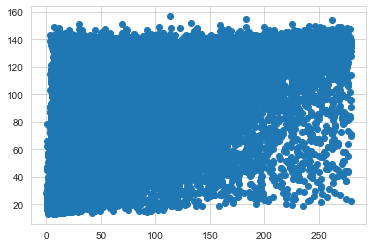

In [78]:
plt.scatter(test_labels, predictions_v2)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

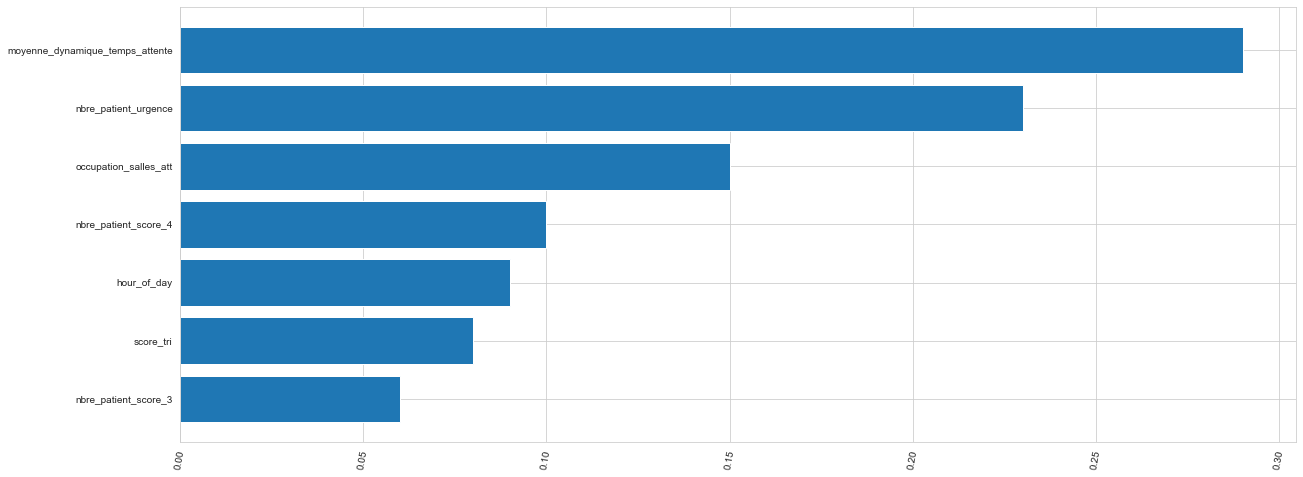

In [431]:
# Get numerical feature importances
importances = list(rf_most_important.feature_importances_)  # List of tuples with variable and importance
important_feature_list = ['moyenne_dynamique_temps_attente','nbre_patient_urgence',
                          'occupation_salles_att','nbre_patient_score_4',
                          'hour_of_day', 'nbre_patient_score_3',
                          'score_tri',
                          ]
feature_importances = [(feature, round(importance, 2)) for feature, importance in
                       zip(important_feature_list, importances)]  # Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=False)  # Print out the feature and importances
"""for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))"""

feature, importance = zip(*feature_importances)
plt.figure(figsize=(20,8))
plt.barh(feature, importance)
plt.xticks(rotation = 80)

Text(0.5, 1.0, 'Actual and Predicted Values')

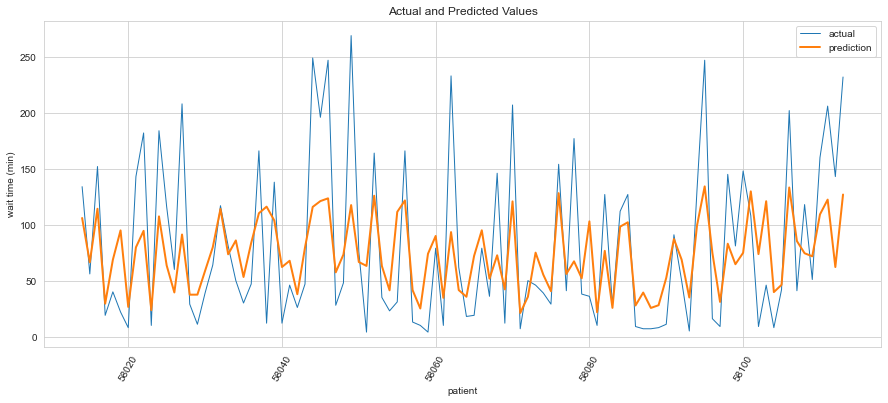

In [79]:
%matplotlib inline
plt.figure(figsize=(15, 6))
predictions_train = rf.predict(train_features)
true_data = pd.DataFrame(
    data={'patient': np.array(x_train.index), 'actual': train_labels.ravel()})  # Dates of predictions

predictions_data = pd.DataFrame(
    data={'patient': np.array(x_train.index), 'prediction': predictions_train})  # Plot the actual values

true_data = true_data[len(true_data) - 100:]
predictions_data = predictions_data[len(predictions_data) - 100:]
plt.plot(true_data['patient'], true_data['actual'], linewidth=1, label='actual')  # Plot the predicted values
plt.plot(predictions_data['patient'], predictions_data['prediction'], linewidth=2, label='prediction')
plt.xticks(rotation='60')
plt.legend()  # Graph labels
plt.xlabel('patient')
plt.ylabel('wait time (min)')
plt.title('Actual and Predicted Values')

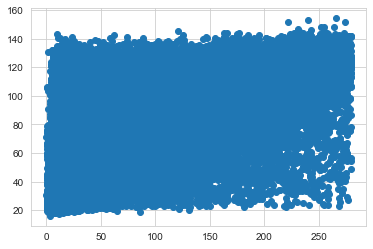

In [82]:
plt.scatter(train_labels, predictions_train)

Text(0.5, 1.0, 'Actual and Predicted Values')

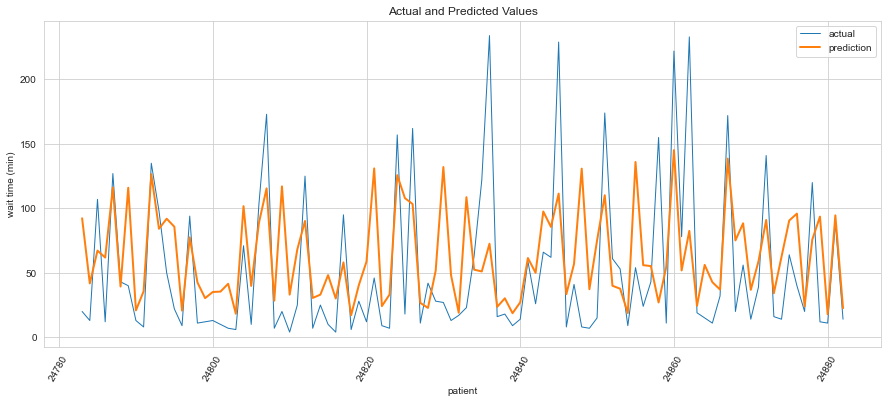

In [433]:
#Plotting results
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 6))

true_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'actual': test_labels.ravel()})  # Dates of predictions

predictions_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'prediction': predictions_v2})  # Plot the actual values

true_data = true_data.iloc[len(true_data) - 100:]
predictions_data = predictions_data.iloc[len(predictions_data) - 100:]
plt.plot(true_data['patient'], true_data['actual'], linewidth=1, label='actual')  # Plot the predicted values
plt.plot(predictions_data['patient'], predictions_data['prediction'], linewidth=2, label='prediction')
plt.xticks(rotation='60')
plt.legend()  # Graph labels
plt.xlabel('patient')
plt.ylabel('wait time (min)')
plt.title('Actual and Predicted Values')

In [72]:
"""from sklearn.model_selection import GridSearchCV

fit_rf = RandomForestRegressor(n_estimators=500, random_state=21)

np.random.seed(21)
start = time.time()

param_dist = {'max_depth': [7, 8, 9, 10, 11],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', 0.1, None],
              'criterion': ['absolute_error', 'squared_error']}
# CV : 10 cross validation
# 3 job en //
# les parametre du dictioannire qu'il va étudier
# fit_rf c 'est l'instation de la méthode RandomForestRegression plus haut qu'on lui passe en entrée pour qu'il sache sur quel
# algo il prépare ces params
cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist,
                     n_jobs = 3)

cv_rf.fit(train_features, train_labels)
print('Best Parameters using grid search: \n',
      cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))"""

"from sklearn.model_selection import GridSearchCV\n\nfit_rf = RandomForestRegressor(n_estimators=500, random_state=21)\n\nnp.random.seed(21)\nstart = time.time()\n\nparam_dist = {'max_depth': [7, 8, 9, 10, 11],\n              'bootstrap': [True, False],\n              'max_features': ['auto', 'sqrt', 'log2', 0.1, None],\n              'criterion': ['absolute_error', 'squared_error']}\n# CV : 10 cross validation\n# 3 job en //\n# les parametre du dictioannire qu'il va étudier\n# fit_rf c 'est l'instation de la méthode RandomForestRegression plus haut qu'on lui passe en entrée pour qu'il sache sur quel\n# algo il prépare ces params\ncv_rf = GridSearchCV(fit_rf, cv = 10,\n                     param_grid=param_dist,\n                     n_jobs = 3)\n\ncv_rf.fit(train_features, train_labels)\nprint('Best Parameters using grid search: \n',\n      cv_rf.best_params_)\nend = time.time()\nprint('Time taken in grid search: {0: .2f}'.format(end - start))"

## 2. Lasso

In [257]:
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, mean_absolute_percentage_error

%matplotlib inline

#plt.figure(figsize=(40, 36))

# Initialise the subplot function using number of rows and columns
#plt.subplots(3, 2)


def lasso_regression(alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha, max_iter=1e5)
    lassoreg.fit(train_features, train_labels)
    y_pred = lassoreg.predict(test_features)

    mae = mean_absolute_error(test_labels, y_pred)
    mape = mean_absolute_percentage_error(test_labels, y_pred)  # Calculate and display accuracy
    mse = mean_squared_error(test_labels, y_pred)
    rmse = mse ** .5
    print("\n..... alpha= ", alpha, " .................")
    print('mae:', mae)
    print('mse:', mse)
    print('rmse:', rmse)
    print('mape:', mape, ' %')

    #Check if a plot is to be made for the entered alpha
    """if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        #plt.tight_layout()
        plt.plot(test_features[-80:], y_pred[-80:])
        plt.plot(test_features[-80:], test_labels[-80:], '.')
        plt.title('Plot for alpha: %.3g' % alpha)"""

    #Return the result in pre-defined format
    rss = sum((y_pred - test_labels) ** 2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

In [258]:
#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss', 'intercept'] + ['coef_x_%d' % i for i in range(1, 24)]
ind = ['alpha_%.2g' % alpha_lasso[i] for i in range(0, 10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10: 231, 1e-5: 232, 1e-4: 233, 1e-3: 234, 1e-2: 235, 1: 236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(alpha_lasso[i], models_to_plot)

# Packing all the plots and displaying them
#plt.tight_layout()
#plt.show()


..... alpha=  1e-15  .................
mae: 53.55255577555269
mse: 5819.294373994438
rmse: 76.28429965592159
mape: 3577025096604.586  %

..... alpha=  1e-10  .................
mae: 53.55255577713745
mse: 5819.29437420597
rmse: 76.28429965730805
mape: 3577025096723.358  %

..... alpha=  1e-08  .................
mae: 53.55255593403784
mse: 5819.294395149431
rmse: 76.28429979458048
mape: 3577025108478.189  %

..... alpha=  1e-05  .................
mae: 53.552861559639
mse: 5819.342514698976
rmse: 76.28461519008256
mape: 3577009382560.6616  %

..... alpha=  0.0001  .................
mae: 53.55338474257535
mse: 5819.375752249101
rmse: 76.28483304202155
mape: 3576982698553.1494  %

..... alpha=  0.001  .................
mae: 53.55627494558863
mse: 5819.275977504044
rmse: 76.2841790773424
mape: 3576911719413.0317  %

..... alpha=  0.01  .................
mae: 53.5869701304495
mse: 5818.8826559509
rmse: 76.28160103164393
mape: 3548498583378.4785  %

..... alpha=  1  .................
mae: 56.

In [ ]:
#coef_matrix_lasso['rss'].apply(lambda x: sum(x))

## 3. Huber regressor

In [434]:
import numpy as np
from sklearn.linear_model import HuberRegressor, LinearRegression

huber = HuberRegressor().fit(train_features, train_labels)
huber.score(train_features, train_labels)
y_pred = huber.predict(test_features)

print("*Huber coefficients:")
mae = mean_absolute_error(test_labels, y_pred)
mape = mean_absolute_percentage_error(test_labels, y_pred)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, y_pred)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

#Linear regression
linear = LinearRegression().fit(train_features, train_labels)
y_pred2 = linear.predict(test_features)

print("\n*Linear Regression coefficients:")
mae = mean_absolute_error(test_labels, y_pred2)
mape = mean_absolute_percentage_error(test_labels, y_pred2)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, y_pred2)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

*Huber coefficients:
mae: 42.4039338135368
mse: 3584.5782163560693
rmse: 59.871347206790574
mape: 5235160073017.696  %

*Linear Regression coefficients:
mae: 43.95191790217287
mse: 3422.5817210363657
rmse: 58.502835153831356
mape: 3208526026580.933  %


Text(0.5, 1.0, 'Actual and Predicted Values: Huber regressor')

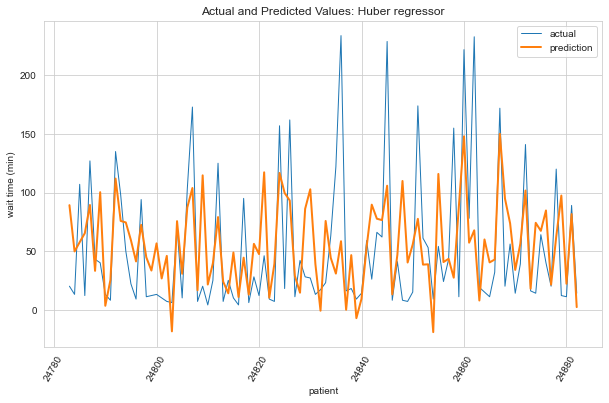

In [435]:
#Plotting results
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 6))

true_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'actual': test_labels.ravel()})  # Dates of predictions

predictions_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'prediction': y_pred})  # Plot the actual values

true_data = true_data.iloc[len(true_data) - 100:]
predictions_data = predictions_data.iloc[len(predictions_data) - 100:]
plt.plot(true_data['patient'], true_data['actual'], linewidth=1, label='actual')  # Plot the predicted values
plt.plot(predictions_data['patient'], predictions_data['prediction'], linewidth=2, label='prediction')
plt.xticks(rotation='60')
plt.legend()  # Graph labels
plt.xlabel('patient')
plt.ylabel('wait time (min)')
plt.title('Actual and Predicted Values: Huber regressor')

Text(0.5, 1.0, 'Actual and Predicted Values: Linear regressor')

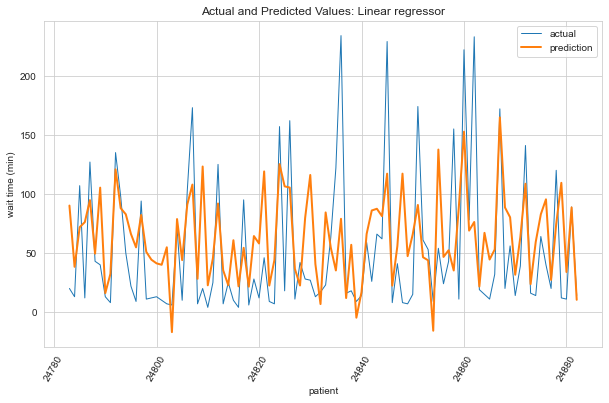

In [436]:
%matplotlib inline
plt.figure(figsize=(10, 6))

true_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'actual': test_labels.ravel()})  # Dates of predictions

predictions_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'prediction': y_pred2.ravel()})  # Plot the actual values

true_data = true_data.iloc[len(true_data) - 100:]
predictions_data = predictions_data.iloc[len(predictions_data) - 100:]
plt.plot(true_data['patient'], true_data['actual'], linewidth=1, label='actual')  # Plot the predicted values
plt.plot(predictions_data['patient'], predictions_data['prediction'], linewidth=2, label='prediction')
plt.xticks(rotation='60')
plt.legend()  # Graph labels
plt.xlabel('patient')
plt.ylabel('wait time (min)')
plt.title('Actual and Predicted Values: Linear regressor')

## 4. SVR

In [437]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

svr_rbf = SVR(kernel="rbf")
svr_lin = SVR(kernel="linear")
svr_poly = SVR(kernel="poly")

In [438]:
svr_rbf = svr_rbf.fit(train_features, train_labels.ravel())
y_pred_rbf = svr_rbf.predict(test_features)

print("*SVR(kernel='rbf') coefficients:")
mae = mean_absolute_error(test_labels, y_pred_rbf)
mape = mean_absolute_percentage_error(test_labels, y_pred_rbf)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, y_pred_rbf)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

*SVR(kernel='rbf') coefficients:
mae: 41.95101574611002
mse: 3708.415555306599
rmse: 60.896761451711036
mape: 1361121948252.6562  %


In [439]:
svr_lin = svr_lin.fit(train_features, train_labels.ravel())
y_pred_lin = svr_lin.predict(test_features)

print("*SVR(kernel='linear') coefficients:")
mae = mean_absolute_error(test_labels, y_pred_lin)
mape = mean_absolute_percentage_error(test_labels, y_pred_lin)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, y_pred_lin)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

*SVR(kernel='linear') coefficients:
mae: 42.86664992044094
mse: 3690.856432342024
rmse: 60.75241914806376
mape: 1904995022676.544  %


In [440]:
svr_poly = svr_poly.fit(train_features, train_labels.ravel())
y_pred_poly = svr_poly.predict(test_features)

print("*SVR(kernel='poly') coefficients:")
mae = mean_absolute_error(test_labels, y_pred_poly)
mape = mean_absolute_percentage_error(test_labels, y_pred_poly)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, y_pred_poly)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

*SVR(kernel='poly') coefficients:
mae: 40.93362708519193
mse: 3583.227146340989
rmse: 59.86006303321931
mape: 2055281934020.5562  %


Text(0.5, 1.0, 'Actual and Predicted Values ANN')

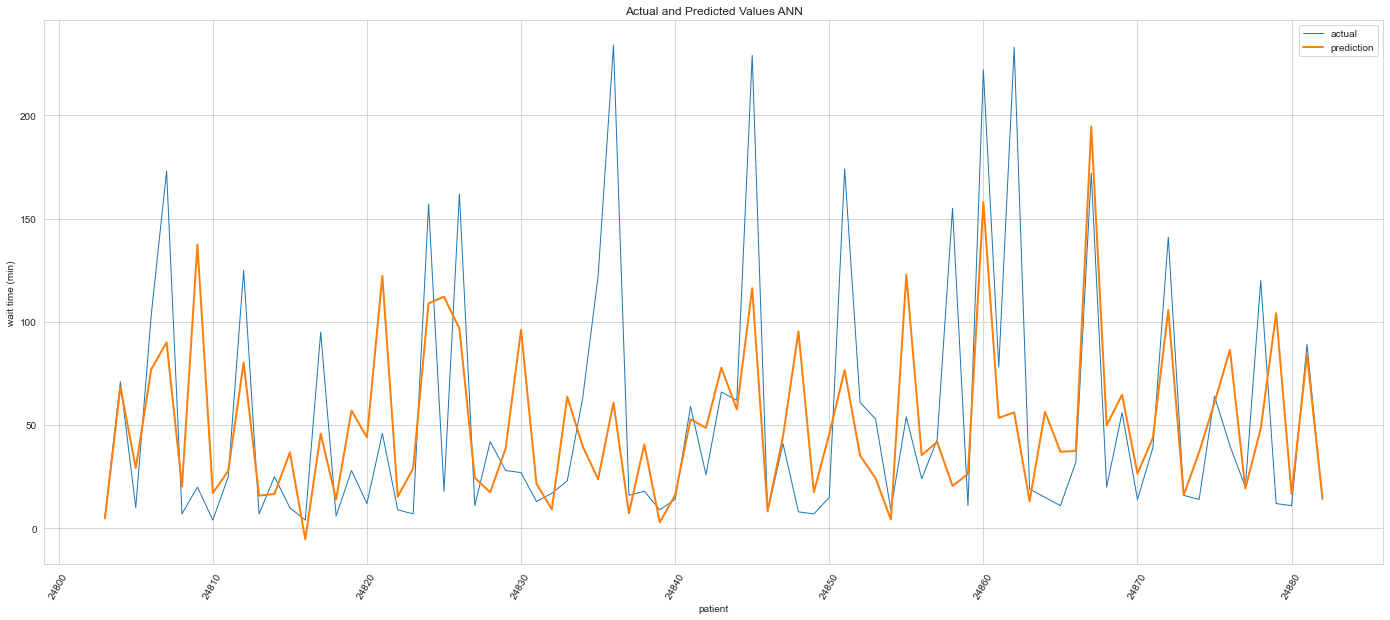

In [441]:
%matplotlib inline
plt.figure(figsize=(24, 10))

true_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'actual': test_labels.ravel()})  # Dates of predictions

predictions_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'prediction': y_pred_poly.ravel()})  # Plot the actual values

true_data = true_data.iloc[len(true_data) - 80:]
predictions_data = predictions_data.iloc[len(predictions_data) - 80:]
plt.plot(true_data['patient'], true_data['actual'], linewidth=1, label='actual')  # Plot the predicted values
plt.plot(predictions_data['patient'], predictions_data['prediction'], linewidth=2, label='prediction')
plt.xticks(rotation='60')
plt.legend()  # Graph labels
plt.xlabel('patient')
plt.ylabel('wait time (min)')
plt.title('Actual and Predicted Values ANN')

## 5. DNN

In [84]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from keras import backend as K

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor



def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

    if len(loss_list) == 0:
        print('Loss is missing in history')
        return

        ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)

    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))

    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    ## Accuracy
    #plt.figure(2)
    #for l in acc_list:
    #    plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    #for l in val_acc_list:
    #    plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    #plt.title('Accuracy')
    #plt.xlabel('Epochs')
    #plt.ylabel('Accuracy')
    #plt.legend()
    plt.show()


In [443]:
from keras.losses import mean_squared_error as mse

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mse(y_true, y_pred))

##### Adam optimizer

In [85]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(25, input_dim=train_features.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(18, activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

# The Output Layer :
NN_model.add(Dense(1))

# Compile the network :
NN_model.compile(loss='mae', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                600       
                                                                 
 dense_1 (Dense)             (None, 18)                468       
                                                                 
 dense_2 (Dense)             (None, 1)                 19        
                                                                 
Total params: 1,087
Trainable params: 1,087
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Define checkpoints
checkpoint_name = os.path.join('model_v1', 'dnn_models', 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5')
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [446]:
NN_model.fit(train_features, train_labels, epochs=150, batch_size=32, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/150
1424/1453 [============================>.] - ETA: 0s - loss: 47.4038 - mean_absolute_error: 47.4038
Epoch 1: val_loss improved from inf to 43.35614, saving model to model_v1\dnn_models\Weights-001--43.35614.hdf5
1453/1453 [==============================] - 2s 1ms/step - loss: 47.2758 - mean_absolute_error: 47.2758 - val_loss: 43.3561 - val_mean_absolute_error: 43.3561
Epoch 2/150
1431/1453 [============================>.] - ETA: 0s - loss: 41.9781 - mean_absolute_error: 41.9781
Epoch 2: val_loss improved from 43.35614 to 42.09314, saving model to model_v1\dnn_models\Weights-002--42.09314.hdf5
1453/1453 [==============================] - 2s 1ms/step - loss: 41.9365 - mean_absolute_error: 41.9365 - val_loss: 42.0931 - val_mean_absolute_error: 42.0931
Epoch 3/150
1409/1453 [============================>.] - ETA: 0s - loss: 41.1542 - mean_absolute_error: 41.1542
Epoch 3: val_loss improved from 42.09314 to 41.49503, saving model to model_v1\dnn_models\Weights-003--41.49503.hdf5


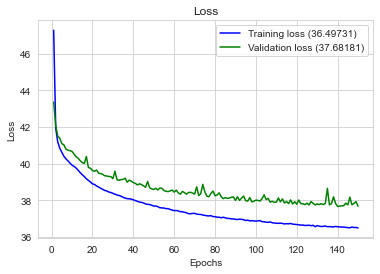

In [447]:
plot_history(NN_model.history)

In [87]:
# Load wights file of the best model :
import os

wights_file = os.path.join('model_v1', 'dnn_models', 'Weights-140--37.67196.hdf5')  # choose the best checkpoint
NN_model.load_weights(wights_file)  # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [88]:
predictions = NN_model.predict(test_features)
#predictions
predictions = np.nan_to_num(predictions, nan=np.nanmean(predictions))
test_labels.shape

778/778 [==============================] - 1s 622us/step


(24883, 1)

In [89]:
predictions.shape

(24883, 1)

In [90]:
#test_labels.dtype = 'float64'
#predictions.dtype = 'float64'
mae = mean_absolute_error(test_labels, predictions)
mape = mean_absolute_percentage_error(test_labels, predictions)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, predictions)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

mae: 37.36319551220499
mse: 3193.622140115549
rmse: 56.51214152830831
mape: 2693759024620.424  %


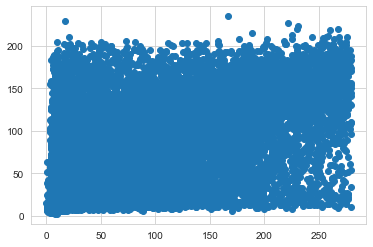

In [96]:
plt.scatter(test_labels, np.round(predictions))

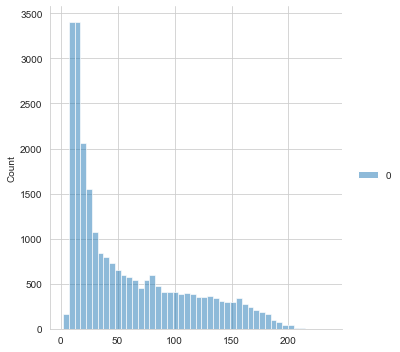

In [99]:
predictions_df = pd.DataFrame(np.round(predictions))
sns.displot(predictions_df)

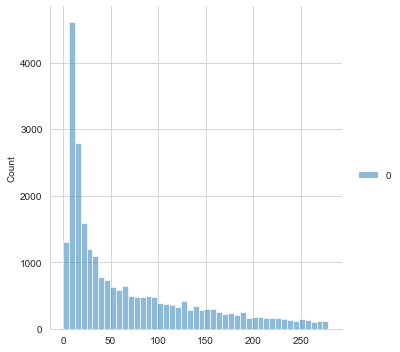

In [100]:
sns.displot(test_labels)

Text(0.5, 1.0, 'Actual and Predicted Values ANN')

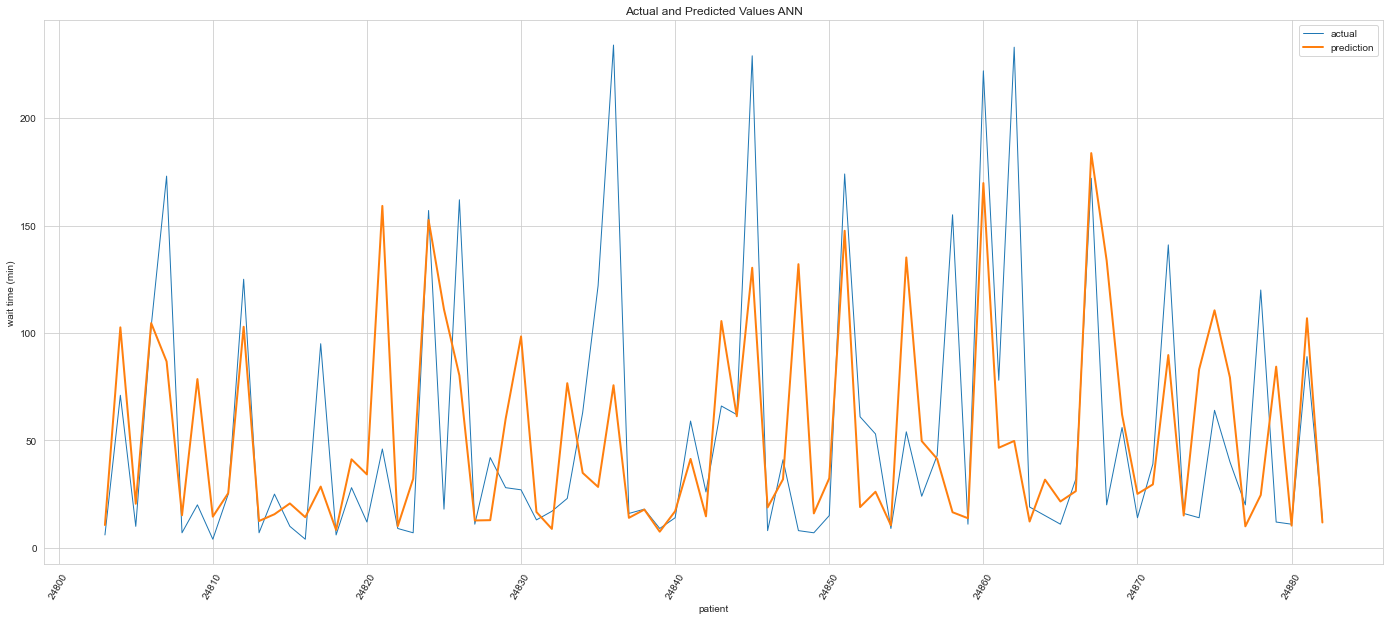

In [465]:
#Plotting results
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(24, 10))

true_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'actual': test_labels.ravel()})  # Dates of predictions

predictions_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'prediction': predictions.ravel()})  # Plot the actual values

true_data = true_data.iloc[len(true_data) - 80:]
predictions_data = predictions_data.iloc[len(predictions_data) - 80:]
plt.plot(true_data['patient'], true_data['actual'], linewidth=1, label='actual')  # Plot the predicted values
plt.plot(predictions_data['patient'], predictions_data['prediction'], linewidth=2, label='prediction')
plt.xticks(rotation='60')
plt.legend()  # Graph labels
plt.xlabel('patient')
plt.ylabel('wait time (min)')
plt.title('Actual and Predicted Values ANN')

##### SGD optimizer

In [453]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(25, input_dim=train_features.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(18, activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
#NN_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

# The Output Layer :
NN_model.add(Dense(1))

# Compile the network :
NN_model.compile(loss='mae', optimizer='rmsprop', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 25)                600       
                                                                 
 dense_10 (Dense)            (None, 18)                468       
                                                                 
 dense_11 (Dense)            (None, 1)                 19        
                                                                 
Total params: 1,087
Trainable params: 1,087
Non-trainable params: 0
_________________________________________________________________


In [454]:
# Define checkpoints
checkpoint_name = os.path.join('model_v1', 'dnn_models_SGD', 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5')
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
callbacks_list = [checkpoint]

In [455]:
NN_model.fit(train_features, train_labels, epochs=150, batch_size=32, validation_split=0.2, callbacks=callbacks_list)


Epoch 1/150
1440/1453 [============================>.] - ETA: 0s - loss: 49.6649 - mean_absolute_error: 49.6649
Epoch 1: val_loss improved from inf to 45.18250, saving model to model_v1\dnn_models_SGD\Weights-001--45.18250.hdf5
1453/1453 [==============================] - 3s 1ms/step - loss: 49.6096 - mean_absolute_error: 49.6096 - val_loss: 45.1825 - val_mean_absolute_error: 45.1825
Epoch 2/150
1431/1453 [============================>.] - ETA: 0s - loss: 43.1002 - mean_absolute_error: 43.1002
Epoch 2: val_loss improved from 45.18250 to 42.83351, saving model to model_v1\dnn_models_SGD\Weights-002--42.83351.hdf5
1453/1453 [==============================] - 2s 1ms/step - loss: 43.1027 - mean_absolute_error: 43.1027 - val_loss: 42.8335 - val_mean_absolute_error: 42.8335
Epoch 3/150
1410/1453 [============================>.] - ETA: 0s - loss: 41.8799 - mean_absolute_error: 41.8799
Epoch 3: val_loss improved from 42.83351 to 42.01001, saving model to model_v1\dnn_models_SGD\Weights-003--42

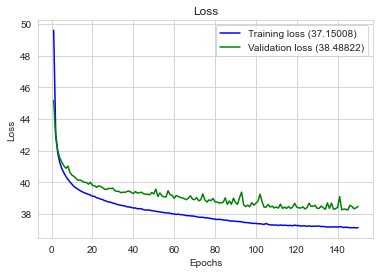

In [456]:
plot_history(NN_model.history)

In [466]:
# Load wights file of the best model :
import os

wights_file = os.path.join('model_v1', 'dnn_models_SGD', 'Weights-145--38.25522.hdf5')  # choose the best checkpoint
NN_model.load_weights(wights_file)  # load it
NN_model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['mean_absolute_error'])

In [467]:
predictions = NN_model.predict(test_features)
#predictions
predictions = np.nan_to_num(predictions, nan=np.nanmean(predictions))
test_labels.shape

778/778 [==============================] - 1s 944us/step


(24883, 1)

In [468]:
mae = mean_absolute_error(test_labels, predictions)
mape = mean_absolute_percentage_error(test_labels, predictions)  # Calculate and display accuracy
mse = mean_squared_error(test_labels, predictions)
rmse = mse ** .5
print('mae:', mae)
print('mse:', mse)
print('rmse:', rmse)
print('mape:', mape, ' %')

mae: 37.834114568446104
mse: 3179.9559253042103
rmse: 56.3910979260398
mape: 2631536283569.6777  %


Text(0.5, 1.0, 'Actual and Predicted Values ANN with SGD optimizer')

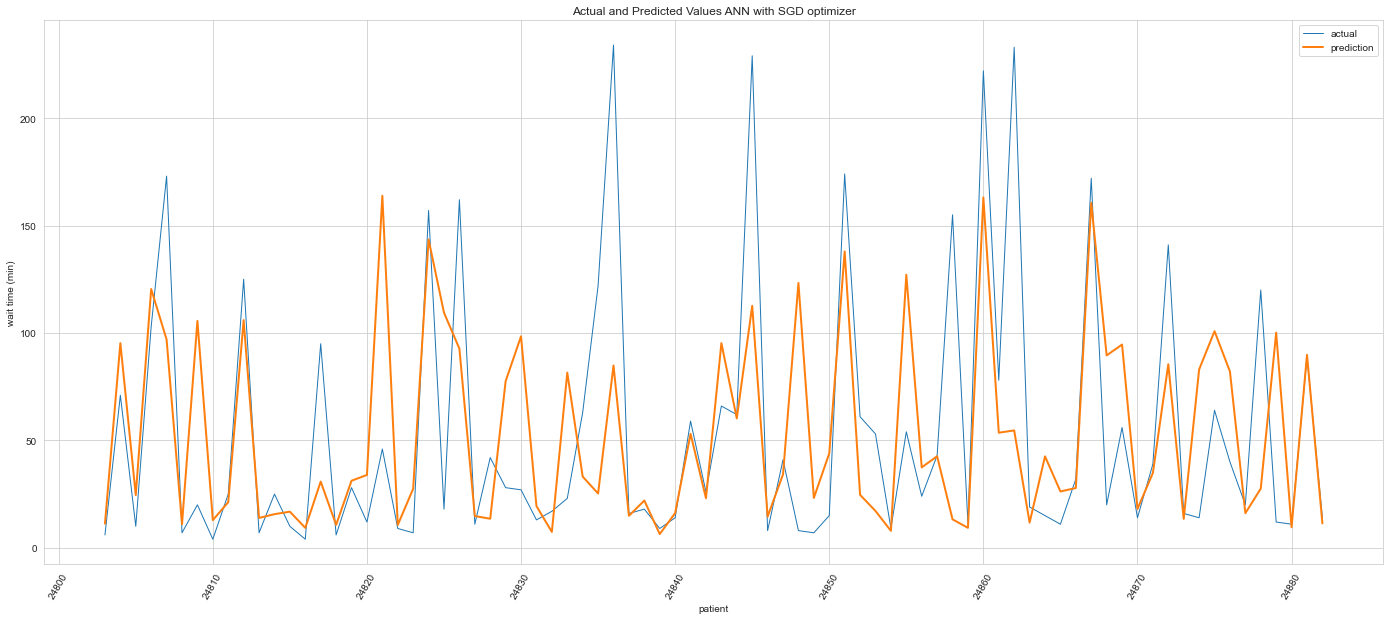

In [469]:
#Plotting results
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(figsize=(24, 10))

true_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'actual': test_labels.ravel()})  # Dates of predictions

predictions_data = pd.DataFrame(
    data={'patient': np.array(x_test.index), 'prediction': predictions.ravel()})  # Plot the actual values

true_data = true_data.iloc[len(true_data) - 80:]
predictions_data = predictions_data.iloc[len(predictions_data) - 80:]
plt.plot(true_data['patient'], true_data['actual'], linewidth=1, label='actual')  # Plot the predicted values
plt.plot(predictions_data['patient'], predictions_data['prediction'], linewidth=2, label='prediction')
plt.xticks(rotation='60')
plt.legend()  # Graph labels
plt.xlabel('patient')
plt.ylabel('wait time (min)')
plt.title('Actual and Predicted Values ANN with SGD optimizer')